In [1]:
import json
import os
import matplotlib.pyplot as plt
from scipy.stats import entropy
import pyximport
pyximport.install(language_level=3)

from config import COCO_train_graphs_json_path
from config import COCO_PRS_json_path
from sims.prs import filter_PRS_histograms, get_sup_ent_lists
from panopticapi.utils import load_png_annotation
from sims.visualization import RelationshipVisualizer, filter_graphs_with_local_data
import cv2

with open(COCO_PRS_json_path, 'r') as f:
    json_data = json.load(f)
with open(COCO_train_graphs_json_path, "r") as f:
    tot_graphs = json.load(f)
    
entr3 = entropy([1/3,1/3,1/3])
minsup = 64
filtered_kb = filter_PRS_histograms(json_data, minsup, entr3)
sup_filtered, ent_filtered = get_sup_ent_lists(filtered_kb)

#graphs = filter_graphs_with_local_data(tot_graphs)

def get_graph(graphs, graph_id):
    for g in graphs:
        name = g['graph']['name']
        if name==graph_id:
            return g
    return None

In [2]:
from sims.graph_utils import show_graphviz_graph, json_to_graphviz
from sims.prs import edge_pruning, node_pruning, filter_PRS_histograms
from config import COCO_PRS_json_path
from scipy.stats import entropy

Average number of links in scene graphs: 5.4
Average number of links in pruned graphs: 1.4
Average number of nodes in graphs: 2.4
Average number of nodes in pruned graphs: 2.4
Number of removed nodes: 0 (0.0%)


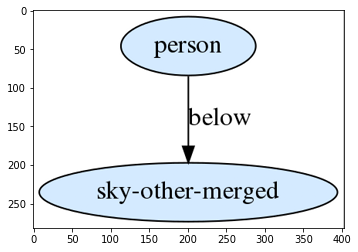

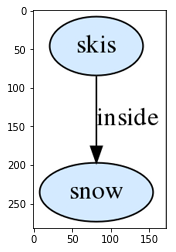

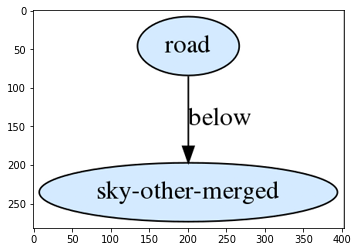

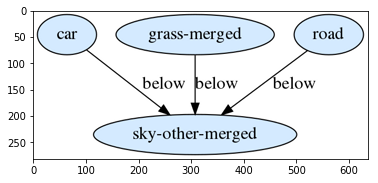

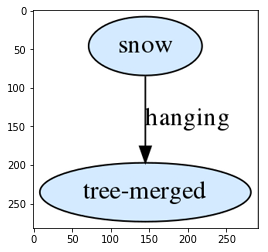

In [7]:
glist=[196096,
5823,
159962,
67463,
1464]
with open(COCO_PRS_json_path) as f:
    prs = json.load(f)
prs = filter_PRS_histograms(prs, 64, entropy([1/3,1/3,1/3]))    
sel_graphs = []
for i in glist:
    sel_graphs.append(get_graph(tot_graphs, i))
sel_graphs=edge_pruning(prs, sel_graphs) 
sel_graphs=node_pruning(sel_graphs)    
    
for graph in sel_graphs:
    fig, ax = plt.subplots(1,1)
    show_graphviz_graph(json_to_graphviz(graph), ax)


Average number of nodes in graphs: 3.6
Average number of nodes in pruned graphs: 3.6
Number of removed nodes: 0 (0.0%)


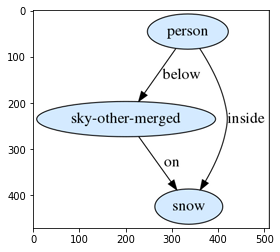

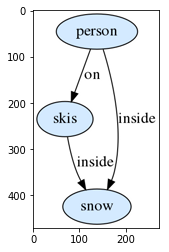

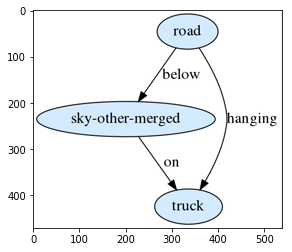

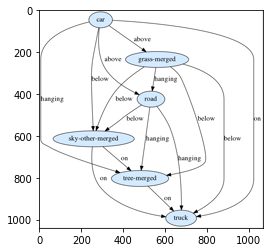

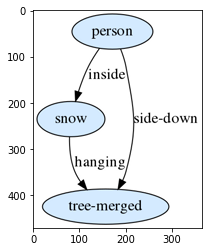

In [6]:
glist=[196096,
5823,
159962,
67463,
1464]
with open(COCO_PRS_json_path) as f:
    prs = json.load(f)
prs = filter_PRS_histograms(prs, 64, entropy([1/3,1/3,1/3]))    
sel_graphs = []
for i in glist:
    sel_graphs.append(get_graph(tot_graphs, i))
#sel_graphs=edge_pruning(prs, sel_graphs) 
sel_graphs=node_pruning(sel_graphs)    
    
for graph in sel_graphs:
    fig, ax = plt.subplots(1,1)
    show_graphviz_graph(json_to_graphviz(graph), ax)